# TASK 3

In [2]:
import random
import numpy as np
import torch.nn as nn
import torch.optim
import torch
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
path =f"C:\\Users\\basir\\Desktop\\dataset deeplearning"

train_data = torch.load(f"{path}\\train_data.pt") 
test_data = torch.load(f"{path}\\test_data.pt") 
y_train = torch.load(f"{path}\\train_labels.pt") 
y_test = torch.load(f"{path}\\test_labels.pt") 

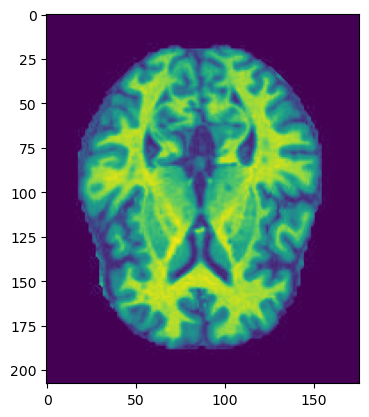

In [4]:
#getting the image of the MRI scan
sample_num = 500
plt.imshow(train_data[sample_num][0], cmap='viridis')
plt.show()

In [5]:
x_train = train_data.view(train_data.shape[0],-1)
x_train.shape #the shape of the train data for the simple neural network model

torch.Size([5121, 109824])

In [6]:
x_test = test_data.view(test_data.shape[0],-1) 
x_test.shape #the shape of the test data for the simple neural network model

torch.Size([1279, 109824])

In [7]:
#creating an instance of standard scaler
s_scaler = StandardScaler()

In [8]:
x_train_numpy = x_train.numpy() # Convert x_train to numpy array and scale it using StandardScaler
x_train_numpy_scaled = s_scaler.fit_transform(x_train_numpy) # scale the numpy array

# Convert scaled numpy array back to PyTorch tensor
x_train = torch.tensor(x_train_numpy_scaled) 
train_data = torch.tensor(x_train.reshape(train_data.shape)) 



x_test_numpy = x_test.numpy() # Convert x_test to numpy array and scale it using StandardScaler
x_test_numpy_scaled = s_scaler.transform(x_test_numpy) # scale the numpy array

# Convert scaled numpy array back to PyTorch tensor
x_test = torch.tensor(x_test_numpy_scaled)
test_data = torch.tensor(x_test.reshape(test_data.shape))


print(f"x_train for simple neural network: {x_train.shape}")
print(f"train_data for CNN: {train_data.shape}")
print()
print(f"x_test for simple neural network: {x_test.shape}")
print(f"test_data for CNN: {test_data.shape}")

C:\Users\30111702\AppData\Local\Temp\ipykernel_8312\4224507256.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_data = torch.tensor(x_train.reshape(train_data.shape))
C:\Users\30111702\AppData\Local\Temp\ipykernel_8312\4224507256.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_data = torch.tensor(x_test.reshape(test_data.shape))


x_train for simple neural network: torch.Size([5121, 109824])
train_data for CNN: torch.Size([5121, 3, 208, 176])

x_test for simple neural network: torch.Size([1279, 109824])
test_data for CNN: torch.Size([1279, 3, 208, 176])


In [9]:
#number of features for simple neural network
no_features = x_train.shape[1]
no_features

109824

In [10]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("running on the GPU")
else:
    device = torch.device("cpu")
    print("running on the CPU")

running on the GPU


# Simple Neural Network

### Basic model

In [11]:
class SimpleNN1(nn.Module):
    
    """Simple neural network with multiple fully connected layers.
    
    """
    
    def __init__(self,n_features):
        
        """Initialize the neural network with the specified number of input features.
        
        """
        
        super().__init__()
        self.fc1 = nn.Linear(n_features,1024)
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512,256)
        self.fc4 = nn.Linear(256,128)
        self.fc5 = nn.Linear(128,64)
        self.fc6 = nn.Linear(64,4) # Output layer with 4 classes
        
        
        
    def forward(self,x):
        
        """Forward pass through the neural network.
        
        """
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.log_softmax(self.fc6(x),dim=1)
        return x
    
    
    def train(self,epochs,x_train,y_train,b_number):
        """Train the neural network using the specified number of epochs, input features, and labels.
        
        """
        self=self.to(device)
        optimizer = optim.SGD(self.parameters(),lr=0.01)
        loss_function = nn.CrossEntropyLoss()
        for epoch in range(epochs):
            for a in tqdm(range(0,len(x_train),b_number)):
                
                batch_for_x = x_train[a:a+b_number].to(device)
                batch_for_y = y_train[a:a+b_number].to(device)
                y_predict = self.forward(batch_for_x)
                loss = loss_function(y_predict,batch_for_y)
                self.zero_grad()
                loss.backward()
                optimizer.step()
                
            print(f"Iteration {epoch} | Loss: {loss}")
            
    def test(self,x_test):
        """Test the neural network using the given test data.
        
        """
        self.to('cpu')
        with torch.no_grad():
            y_predicted = self.forward(x_test)
        y_predicted = torch.argmax(y_predicted,dim=1)
        
        return y_predicted
        
    def accuracy(self,y_predicted,y_test):
        """Compute the accuracy of the model predictions.
        
        """
        
        no_of_pred = []
        
        for a in range(len(y_test)):
            if y_predicted[a]==y_test[a]:
                no_of_pred.append(a)
            
        
        accuracy = len(no_of_pred)/len(y_test)
        print(f"accuracy is: {accuracy}")
                   

In [12]:
#Creating an instance of the model
model1 = SimpleNN1(n_features=no_features)
model1

SimpleNN1(
  (fc1): Linear(in_features=109824, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=64, bias=True)
  (fc6): Linear(in_features=64, out_features=4, bias=True)
)

In [13]:
model1.train(epochs=10,x_train=x_train,y_train=y_train,b_number=100) #Training the model

100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:03<00:00, 14.71it/s]


Iteration 0 | Loss: 1.2593581676483154


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:01<00:00, 49.52it/s]


Iteration 1 | Loss: 1.1700522899627686


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:01<00:00, 49.62it/s]


Iteration 2 | Loss: 1.0825328826904297


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:01<00:00, 49.85it/s]


Iteration 3 | Loss: 0.964104950428009


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:01<00:00, 50.63it/s]


Iteration 4 | Loss: 0.8481053709983826


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:01<00:00, 50.09it/s]


Iteration 5 | Loss: 0.7952917218208313


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:01<00:00, 50.66it/s]


Iteration 6 | Loss: 0.7507544755935669


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:01<00:00, 50.10it/s]


Iteration 7 | Loss: 0.6873851418495178


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:01<00:00, 50.48it/s]


Iteration 8 | Loss: 0.562760591506958


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:01<00:00, 50.44it/s]

Iteration 9 | Loss: 0.36187079548835754


In [14]:
y_predicted_basic = model1.test(x_test=x_test) #Getting the predicted values using the test data as the input

In [15]:
model1.accuracy(y_predicted=y_predicted_basic,y_test=y_test) #calculating the model accuracy

accuracy is: 0.5191555903049258


The basic model produces an accuracy of approximately 52%

### Improved simple neural network

In [16]:

class SimpleNN2(nn.Module):
    
    """Simple neural network with multiple fully connected layers.
    
    """
    
    def __init__(self,n_features):
        
        """Initialize the neural network with the specified number of input features.
        
        """
        
        super().__init__()
        self.fc1 = nn.Linear(n_features,128)
        self.fc2 = nn.Linear(128,4)
        
        
    def forward(self,x):
        
        """Forward pass through the neural network.
        
        """
        
        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x),dim=1)
        return x
    
    
    def train(self,epochs,x_train,y_train,b_number):
        """Train the neural network using the specified number of epochs, input features, and labels.
        
        """
        self=self.to(device)
        print(device)
        optimizer = optim.SGD(self.parameters(),lr=0.01)
        loss_function = nn.CrossEntropyLoss()
        for epoch in range(epochs):
            for a in tqdm(range(0,len(x_train),b_number)):
                
                batch_for_x = x_train[a:a+b_number].to(device)
                batch_for_y = y_train[a:a+b_number].to(device)
                y_predict = self.forward(batch_for_x)
                loss = loss_function(y_predict,batch_for_y)
                self.zero_grad()
                loss.backward()
                optimizer.step()
                
            print(f"Iteration {epoch} | Loss: {loss}")
            
    def test(self,x_test):
        """Test the neural network using the given test data.
        
        """
        self.to('cpu')
        with torch.no_grad():
            y_predicted = self.forward(x_test)
        y_predicted = torch.argmax(y_predicted,dim=1)
        
        return y_predicted
        
    def accuracy(self,y_predicted,y_test):
        """Compute the accuracy of the model predictions.
        
        """
        
        no_of_pred = []
        
        for a in range(len(y_test)):
            if y_predicted[a]==y_test[a]:
                no_of_pred.append(a)
            
        
        accuracy = len(no_of_pred)/len(y_test)
        print(f"accuracy is: {accuracy}")
                   

In [17]:
#Creating an instance of the model
model2 = SimpleNN2(n_features=no_features)
model2

SimpleNN2(
  (fc1): Linear(in_features=109824, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=4, bias=True)
)

In [18]:
model2.train(epochs=12,x_train=x_train,y_train=y_train,b_number=10) #Training the model

cuda:0


100%|███████████████████████████████████████████████████████████████████████████████| 513/513 [00:01<00:00, 495.66it/s]


Iteration 0 | Loss: 0.0005088941543363035


100%|███████████████████████████████████████████████████████████████████████████████| 513/513 [00:01<00:00, 501.97it/s]


Iteration 1 | Loss: 0.0


100%|███████████████████████████████████████████████████████████████████████████████| 513/513 [00:01<00:00, 501.67it/s]


Iteration 2 | Loss: 0.0


100%|███████████████████████████████████████████████████████████████████████████████| 513/513 [00:01<00:00, 505.43it/s]


Iteration 3 | Loss: 0.0


100%|███████████████████████████████████████████████████████████████████████████████| 513/513 [00:01<00:00, 500.01it/s]


Iteration 4 | Loss: 0.0


100%|███████████████████████████████████████████████████████████████████████████████| 513/513 [00:01<00:00, 501.48it/s]


Iteration 5 | Loss: 0.0


100%|███████████████████████████████████████████████████████████████████████████████| 513/513 [00:01<00:00, 497.32it/s]


Iteration 6 | Loss: 0.0


100%|███████████████████████████████████████████████████████████████████████████████| 513/513 [00:01<00:00, 501.48it/s]


Iteration 7 | Loss: 0.0


100%|███████████████████████████████████████████████████████████████████████████████| 513/513 [00:01<00:00, 501.48it/s]


Iteration 8 | Loss: 0.0


100%|███████████████████████████████████████████████████████████████████████████████| 513/513 [00:01<00:00, 489.98it/s]


Iteration 9 | Loss: 0.0


100%|███████████████████████████████████████████████████████████████████████████████| 513/513 [00:01<00:00, 495.66it/s]


Iteration 10 | Loss: 0.0


100%|███████████████████████████████████████████████████████████████████████████████| 513/513 [00:01<00:00, 492.33it/s]

Iteration 11 | Loss: 0.0


In [19]:
y_predicted_improved = model2.test(x_test=x_test) #Getting the predicted values using the test data as the input

In [20]:
model2.accuracy(y_predicted=y_predicted_improved,y_test=y_test) #calculating the model accuracy

accuracy is: 0.674745895230649


The accuracy for the improved model indicates that the improved model performs better than the basic model.
The improved model scored an accuracy of 67.47%

# CNN

In [21]:
#checking the shape of the data
class Conv_NNtest(nn.Module):
    def __init__(self, n_channels):
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels = n_channels, out_channels = 8, kernel_size = (5,5) )
        self.conv2 = nn.Conv2d(in_channels = 8, out_channels = 16,  kernel_size = (5,5))
        self.pool = nn.MaxPool2d((2,2))
        
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)

        x = F.relu(self.conv2(x))
        x = self.pool(x)

        print(f"Step 1: Shape of Data before Flattening: {x.shape}")
        return x


In [22]:
net = Conv_NNtest(n_channels=3)
test_output = net.forward(test_data[0:10])

Step 1: Shape of Data before Flattening: torch.Size([10, 16, 49, 41])


### Basic model

In [23]:
class Conv_NN1(nn.Module):
    
    """Basic convolutional neural network model.
    
    """
    
    def __init__(self, n_channels):
        
        """Initialize the convolutional neural network with the specified number of input channels.
        
        """
        
        super().__init__()
        # Define convolutional layers
        self.conv1 = nn.Conv2d(in_channels = n_channels, out_channels = 8, kernel_size = (5,5) )
        self.conv2 = nn.Conv2d(in_channels = 8, out_channels = 16,  kernel_size = (5,5))
        
        # Define pooling layer
        self.pool = nn.MaxPool2d((2,2))
        
        # Define flatten layer
        self.flatten = nn.Flatten(1)
        
        # Define fully connected layers
        self.fc1 = nn.Linear(16*49*41, 3000) # Adjust the input size based on the output size of the previous layer
        self.fc2 = nn.Linear(3000, 4) # Output layer with 4 classes
        
    def forward(self, x):
        
        """Forward pass through the convolutional neural network.
        
        """
        
        x = F.relu(self.conv1(x))
        x = self.pool(x)

        x = F.relu(self.conv2(x))
        x = self.pool(x)
        
        x = self.flatten(x)
        
        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x), dim = 1)
        return x
    
    
    def train(self,epochs,x_train,y_train,batch_number):
        
        """Train the convolutional neural network.
               
        """
        self=self.to(device)
        optimizer = torch.optim.SGD(self.parameters(),lr=0.01)
        loss_function = nn.CrossEntropyLoss()
        
        for epoch in range(epochs):
            for i in tqdm(range(0,len(x_train),batch_number)):
                
                batch_x = x_train[i:i+batch_number].to(device)
                batch_y = y_train[i:i+batch_number].to(device)
                y_predict = self.forward(batch_x)
                loss = loss_function(y_predict,batch_y)
                
                self.zero_grad()
                loss.backward()
                
                optimizer.step()
                
            print(f"Iteration {epoch} | Loss: {loss}")
            
    def test(self,x_test):
        
        """Test the convolutional neural network.
        
        """
        self.to('cpu')
        with torch.no_grad():
            y_predicted = self.forward(x_test)
            
        y_predicted = torch.argmax(y_predicted,dim=1)
        
        return y_predicted
        
    def accuracy(self,y_pred,y_test):
        
        """Compute the accuracy of the convolutional neural network predictions.
        
        """
        
        no_of_pred = []
        
        for a in range(len(y_test)):
            if y_pred[a]==y_test[a]:
                no_of_pred.append(a)
            
        accuracy = len(no_of_pred)/len(y_test)
        print(f"accuracy is: {accuracy}")
                   

In [24]:
#Creating an instance of the model
mod1 = Conv_NN1(n_channels=3)

In [25]:
mod1.train(epochs=10,x_train=train_data,y_train=y_train,batch_number=100) #Training the model

100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:03<00:00, 15.28it/s]


Iteration 0 | Loss: 0.8578770160675049


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:02<00:00, 20.64it/s]


Iteration 1 | Loss: 0.7697195410728455


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:02<00:00, 20.67it/s]


Iteration 2 | Loss: 0.6495739817619324


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:02<00:00, 21.26it/s]


Iteration 3 | Loss: 0.5119942426681519


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:02<00:00, 21.30it/s]


Iteration 4 | Loss: 0.3812304437160492


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:02<00:00, 21.22it/s]


Iteration 5 | Loss: 0.6693288683891296


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:02<00:00, 20.93it/s]


Iteration 6 | Loss: 0.2728969156742096


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:02<00:00, 21.00it/s]


Iteration 7 | Loss: 0.2659185528755188


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:02<00:00, 20.66it/s]


Iteration 8 | Loss: 0.04898608475923538


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:02<00:00, 21.25it/s]

Iteration 9 | Loss: 0.026833144947886467


In [26]:
#Getting the predicted values using the test data as the input
y_predicted_basic= mod1.test(x_test=test_data)

In [27]:
#calculating the model accuracy
mod1.accuracy(y_pred=y_predicted_basic,y_test=y_test)

accuracy is: 0.5942142298670836


The basic model under CNN produces an accuracy of 59.4%

In [28]:
#checking the shape of the data
class Conv_NNtest(nn.Module):
    def __init__(self, n_channels):
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels = n_channels, out_channels = 16, kernel_size = (5,5) )
        self.conv2 = nn.Conv2d(in_channels = 16, out_channels = 32,  kernel_size = (5,5))
        self.conv3 = nn.Conv2d(in_channels = 32, out_channels = 64,  kernel_size = (5,5))
        self.pool = nn.MaxPool2d((2,2))
        
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)

        x = F.relu(self.conv2(x))
        x = self.pool(x)
        
        x = F.relu(self.conv3(x))
        x = self.pool(x)

        print(f"Step 1: Shape of Data before Flattening: {x.shape}")
        return x


In [29]:
net = Conv_NNtest(n_channels=3)
test_output = net.forward(train_data[0:10])

Step 1: Shape of Data before Flattening: torch.Size([10, 64, 22, 18])


# improved convolutional model

In [30]:
class Conv_NN2(nn.Module):
    
    """Basic convolutional neural network model.
    
    """
    
    def __init__(self, n_channels):
        
        """Initialize the convolutional neural network with the specified number of input channels.
        
        """
        
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels = n_channels, out_channels = 16, kernel_size = (5,5) )
        self.conv2 = nn.Conv2d(in_channels = 16, out_channels = 32,  kernel_size = (5,5))
        self.conv3 = nn.Conv2d(in_channels = 32, out_channels = 64,  kernel_size = (5,5))
        self.pool = nn.MaxPool2d((2,2))
        
        self.flatten = nn.Flatten(1)
        
        self.fc1 = nn.Linear(64*22*18, 128)
        self.fc2 = nn.Linear(128, 4)
        
    def forward(self, x):
        
        """Forward pass through the convolutional neural network.
        
        """
        
        x = F.relu(self.conv1(x))
        x = self.pool(x)

        x = F.relu(self.conv2(x))
        x = self.pool(x)
        
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        
        x = self.flatten(x)
        
        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x), dim = 1)
        return x
    
    
    def train(self,epochs,x_train,y_train,batch_number):
        
        """Train the convolutional neural network.
               
        """
        self=self.to(device)
        optimizer = torch.optim.SGD(self.parameters(),lr=0.01)
        loss_function = nn.CrossEntropyLoss()
        
        for epoch in range(epochs):
            for i in tqdm(range(0,len(x_train),batch_number)):
                
                batch_x = x_train[i:i+batch_number].to(device)
                batch_y = y_train[i:i+batch_number].to(device)
                y_predict = self.forward(batch_x)
                loss = loss_function(y_predict,batch_y)
                
                self.zero_grad()
                loss.backward()
                
                optimizer.step()
                
            print(f"Iteration {epoch} | Loss: {loss}")
            
    def test(self,x_test):
        
        """Test the convolutional neural network.
        
        """
        self.to('cpu')
        with torch.no_grad():
            y_predicted = self.forward(x_test)
            
        y_predicted = torch.argmax(y_predicted,dim=1)
        
        return y_predicted
        
    def accuracy(self,y_pred,y_test):
        
        """Compute the accuracy of the convolutional neural network predictions.
        
        """
        
        no_of_pred = []
        
        for a in range(len(y_test)):
            if y_pred[a]==y_test[a]:
                no_of_pred.append(a)
            
        accuracy = len(no_of_pred)/len(y_test)
        print(f"accuracy is: {accuracy}")
                   

In [31]:
mod2 = Conv_NN2(n_channels=3) #Creating an instance of the model

In [32]:
#Training the model
mod2.train(epochs=10,x_train=train_data,y_train=y_train,batch_number=5)

100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:04<00:00, 239.83it/s]


Iteration 0 | Loss: 0.022786099463701248


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:04<00:00, 253.21it/s]


Iteration 1 | Loss: 7.152531907195225e-06


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:04<00:00, 255.68it/s]


Iteration 2 | Loss: 1.1920928244535389e-07


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:04<00:00, 248.32it/s]


Iteration 3 | Loss: 0.0


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:03<00:00, 256.86it/s]


Iteration 4 | Loss: 0.0


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:03<00:00, 257.74it/s]


Iteration 5 | Loss: 0.0


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:03<00:00, 257.05it/s]


Iteration 6 | Loss: 0.0


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:03<00:00, 256.90it/s]


Iteration 7 | Loss: 0.0


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:03<00:00, 256.83it/s]


Iteration 8 | Loss: 0.0


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:04<00:00, 248.75it/s]

Iteration 9 | Loss: 0.0


In [33]:
y_predicted_improved= mod2.test(x_test=test_data) #Getting the predicted values using the test data as the input

In [34]:
mod2.accuracy(y_pred=y_predicted_improved,y_test=y_test) #accuracy of the model

accuracy is: 0.6872556684910086


The improved model under CNN provides an accuracy of 68.72%

### learning rate of 0.000000001 for improved convolutional model

In [35]:
class Conv_NN3(nn.Module):
    
    """Basic convolutional neural network model.
    
    """
    
    def __init__(self, n_channels):
        
        """Initialize the convolutional neural network with the specified number of input channels.
        
        """
        
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels = n_channels, out_channels = 16, kernel_size = (5,5) )
        self.conv2 = nn.Conv2d(in_channels = 16, out_channels = 32,  kernel_size = (5,5))
        self.conv3 = nn.Conv2d(in_channels = 32, out_channels = 64,  kernel_size = (5,5))
        self.pool = nn.MaxPool2d((2,2))
        
        self.flatten = nn.Flatten(1)
        
        self.fc1 = nn.Linear(64*22*18, 128)
        self.fc2 = nn.Linear(128, 4)
        
    def forward(self, x):
        
        """Forward pass through the convolutional neural network.
        
        """
        
        x = F.relu(self.conv1(x))
        x = self.pool(x)

        x = F.relu(self.conv2(x))
        x = self.pool(x)
        
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        
        x = self.flatten(x)
        
        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x), dim = 1)
        return x
    
    
    def train(self,epochs,x_train,y_train,batch_number):
        
        """Train the convolutional neural network
               
        """
        self=self.to(device)
        optimizer = torch.optim.SGD(self.parameters(),lr=0.00000001) #learning rate of 0.00000001
        loss_function = nn.CrossEntropyLoss()
        
        for epoch in range(epochs):
            for i in tqdm(range(0,len(x_train),batch_number)):
                
                batch_x = x_train[i:i+batch_number].to(device)
                batch_y = y_train[i:i+batch_number].to(device)
                y_predict = self.forward(batch_x)
                loss = loss_function(y_predict,batch_y)
                
                self.zero_grad()
                loss.backward()
                
                optimizer.step()
                
            print(f"Iteration {epoch} | Loss: {loss}")
            
    def test(self,x_test):
        
        """Test the convolutional neural network.
        
        """
        self.to('cpu')
        with torch.no_grad():
            y_predicted = self.forward(x_test)
            
        y_predicted = torch.argmax(y_predicted,dim=1)
        
        return y_predicted
        
    def accuracy(self,y_pred,y_test):
        
        """Compute the accuracy of the convolutional neural network predictions.
        
        """
        
        no_of_pred = []
        
        for a in range(len(y_test)):
            if y_pred[a]==y_test[a]:
                no_of_pred.append(a)
            
        accuracy = len(no_of_pred)/len(y_test)
        print(f"accuracy is: {accuracy}")
                   

In [36]:
mod3 = Conv_NN3(n_channels=3) #Creating an instance of the model

In [37]:
mod3.train(epochs=10,x_train=train_data,y_train=y_train,batch_number=5) #training the model

100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:04<00:00, 235.38it/s]


Iteration 0 | Loss: 1.391502857208252


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:04<00:00, 255.23it/s]


Iteration 1 | Loss: 1.391454815864563


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:03<00:00, 256.64it/s]


Iteration 2 | Loss: 1.3914062976837158


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:03<00:00, 257.67it/s]


Iteration 3 | Loss: 1.3913586139678955


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:03<00:00, 256.81it/s]


Iteration 4 | Loss: 1.3913108110427856


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:04<00:00, 253.03it/s]


Iteration 5 | Loss: 1.391262173652649


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:04<00:00, 252.55it/s]


Iteration 6 | Loss: 1.3912138938903809


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:03<00:00, 257.56it/s]


Iteration 7 | Loss: 1.391165852546692


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:03<00:00, 256.66it/s]


Iteration 8 | Loss: 1.3911175727844238


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:03<00:00, 257.54it/s]

Iteration 9 | Loss: 1.3910696506500244


In [38]:
y_predicted_improved_l1= mod3.test(x_test=test_data) #getting predictions

In [39]:
mod3.accuracy(y_pred=y_predicted_improved_l1,y_test=y_test) #model accuracy

accuracy is: 0.1931196247068022


## learning rate of 10 for improved convolutional model

In [45]:

class Conv_NN4(nn.Module):
    
    """Basic convolutional neural network model.
    
    """
    
    def __init__(self, n_channels):
        
        """Initialize the convolutional neural network with the specified number of input channels.
        
        """
        
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels = n_channels, out_channels = 16, kernel_size = (5,5) )
        self.conv2 = nn.Conv2d(in_channels = 16, out_channels = 32,  kernel_size = (5,5))
        self.conv3 = nn.Conv2d(in_channels = 32, out_channels = 64,  kernel_size = (5,5))
        self.pool = nn.MaxPool2d((2,2))
        
        self.flatten = nn.Flatten(1)
        
        self.fc1 = nn.Linear(64*22*18, 128)
        self.fc2 = nn.Linear(128, 4)
        
    def forward(self, x):
        
        """Forward pass through the convolutional neural network.
        
        """
        
        x = F.relu(self.conv1(x))
        x = self.pool(x)

        x = F.relu(self.conv2(x))
        x = self.pool(x)
        
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        
        x = self.flatten(x)
        
        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x), dim = 1)
        return x
    
    
    def train(self,epochs,x_train,y_train,batch_number):
        
        """Train the convolutional neural network
               
        """
        self=self.to(device)
        optimizer = torch.optim.SGD(self.parameters(),lr=10)
        loss_function = nn.CrossEntropyLoss()
        
        for epoch in range(epochs):
            for i in tqdm(range(0,len(x_train),batch_number)):
                
                batch_x = x_train[i:i+batch_number].to(device)
                batch_y = y_train[i:i+batch_number].to(device)
                y_predict = self.forward(batch_x)
                loss = loss_function(y_predict,batch_y)
                
                self.zero_grad()
                loss.backward()
                
                optimizer.step()
                
            print(f"Iteration {epoch} | Loss: {loss}")
            
    def test(self,x_test):
        
        """Test the convolutional neural network.
        
        """
        self.to('cpu')
        with torch.no_grad():
            y_predicted = self.forward(x_test)
            
        y_predicted = torch.argmax(y_predicted,dim=1)
        
        return y_predicted
        
    def accuracy(self,y_pred,y_test):
        
        """Compute the accuracy of the convolutional neural network predictions.
        
        """
        
        no_of_pred = []
        
        for a in range(len(y_test)):
            if y_pred[a]==y_test[a]:
                no_of_pred.append(a)
            
        accuracy = len(no_of_pred)/len(y_test)
        print(f"accuracy is: {accuracy}")
                   

In [46]:
mod4 = Conv_NN4(n_channels=3) #setting an instance

In [47]:
mod4.train(epochs=10,x_train=train_data,y_train=y_train,batch_number=5) #training the model

100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:04<00:00, 243.46it/s]


Iteration 0 | Loss: nan


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:03<00:00, 257.41it/s]


Iteration 1 | Loss: nan


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:03<00:00, 257.89it/s]


Iteration 2 | Loss: nan


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:03<00:00, 258.07it/s]


Iteration 3 | Loss: nan


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:03<00:00, 258.00it/s]


Iteration 4 | Loss: nan


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:03<00:00, 257.55it/s]


Iteration 5 | Loss: nan


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:03<00:00, 257.74it/s]


Iteration 6 | Loss: nan


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:03<00:00, 258.05it/s]


Iteration 7 | Loss: nan


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:03<00:00, 258.19it/s]


Iteration 8 | Loss: nan


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:03<00:00, 257.80it/s]

Iteration 9 | Loss: nan


In [48]:
y_predicted_improved_l2= mod4.test(x_test=test_data) #getting predictions

In [49]:
mod4.accuracy(y_pred=y_predicted_improved_l2,y_test=y_test) #accuracy of the model

accuracy is: 0.13995308835027365


From the above model with the learning rate of 0.00000001, the accuracy recorded was almost 20% which indicates that the model performs badly. Further, the model trained with the learning rate of 10 indicates that the model is unable to generalize well, hence producing a loss of 'nan'. This 'nan' indicates that the loss cannot be properly calculated.

Discussion of Part 2

Advantages of Higher Batch Size

1.	Efficient GPU utilization: GPU utilization is more efficient with larger batch sizes; modern deep learning frameworks are optimised for larger batch sizes. It makes good use of parallelism in the GPU architectures.

2.	Reduce Training time: Training with higher larger batch sizes leads to faster convergence because parameter updates are made less frequently, reducing the overhead associated with updating model weights.

3.	Smoothing of Gradients: A smooth estimate of gradients is provided by higher batch size which helps to avoid noise in the optimization landscape.

4.	More stable learning: Higher batch size leads to more stable gradient leading to smoother training curves and potentially better generalization.

5.	Regularization Effect: It can act as a form of implicit regularization, preventing the model from overfitting by averaging gradients over examples.


Advantages of Lower Batch Size

1.	Better Convergence: Lower batch size can lead to better convergence especially when dealing with highly non-convex optimization landscapes.

2.	Memory Efficiency: It requires less memory which is an advantage when working with limited computational resources.

3.	Adaptive to Online Learning: It is more suitable for online learning scenarios where new data are spontaneous, as they allow the model to adapt quickly to changes in the data distribution.

4.	Exploring different Minima: Training with smaller batches can help model explore different local minima of the loss function, potentially leading to better solutions.

5.	Improves Generalization: Lower batch sizes allow the model to update its parameters more frequently, which can lead to better generalization, especially when dealing with noisy or non-stationary data.


 Disadvantages of Higher Batch Size
 
1.	Memory Requirements: It requires more memory which maybe more than the available resources on the hardware, particularly on GPUs with limited memory.

2.	Slow Updates: Parameter updates are made less frequently with larger batch sizes which may lead to slower progress during training and a longer time to reach convergence.

3.	Reduced Stochasticity: Higher batch size results in less stochasticity during training making it harder for model to escape local minima or explore the solution space effectively.

4.	Difficulty in finding Suitable learning Rates: Higher batch sizes often need careful tuning of learning rates to prevent divergence or slow convergence, which can be challenging and time consuming.

5.	Generalization issues: while higher batch size can lead to faster convergence, they may also result in poorer generalization performance, especially when the data is highly varied or noisy. The model might converge to suboptimal solutions.


Disadvantages of Lower Batch Size

1.	Noise in gradient estimates: lower batch sizes result in noiser estimates of the gradients, which can lead to more fluctuation in the training process and hinder convergence.

2.	Less efficient GPU Utilization: It may underutilize the computational power of GPUs, leading to lower hardware efficiency and longer training times.

3.	Increased Variability: it introduces more variability in parameter updates when training with small batch sizes which can lead to instability during training and slower convergence.

4.	Higher Computational Overhead: Training with small batch sizes requires more frequent updates to model parameters, resulting in higher computational overhead, especially when dealing with large models/data sets.

5.	Difficulty in Parallelization: Smaller batch sizes may limit opportunities for parallelization, as fewer computations can be performed simultaneously across different examples.


Advantages of Higher Learning Rate

1.	Efficiency in Stochastic optimization: in Stochastic optimization settings, higher learning rates can help the model learn faster from each mini-batch, leading to faster convergence and more efficient use of computational resources.

2.	Better exploratory features: it can encourage the model to quickly adapt to features in the data, especially when the features have large gradients, leading to more efficient learning.

3.	Exploration of the solution space: Higher learning rates allow the model to explore a larger portion of the solution space in a shorter amount of time, which can be beneficial for finding promising regions of the parameter space.

4.	Faster Convergence: it can lead to higher convergence training, as they cause larger updates to model parameters in each iteration. 

5.	Escaping Local Minima: It can help the optimization algorithm escape local minima and saddle points more easily, enabling the model to explore the solution space more effectively and potentially find better solutions.


Advantages of Lower Learning Rate

1.	Improved Stability: Lower learning rates tend to lead to more stable training dynamics, as they result in smaller updates to model parameters. This stability can help prevent divergence during training and result in smoother optimization trajectories.

2.	Better Generalization: Lower learning rates can often lead to better generalization performance, as they encourage the model to make smaller adjustments to the parameters, which can help prevent overfitting and improve the model’s ability to generalize unseen data.

3.	Fine-Grained Parameter Updates: It allows for finer-grained updates to model parameters, which can be advantageous when the optimization landscape is complex or when dealing with noisy or high-dimensional data.

4.	More Precise Optimization: Lower learning rates enable the optimization algorithm to make smaller adjustments to the model parameters, potentially leading to more precise optimization and better convergence to the global minimum of the loss function.

5.	Better Handling of Noisy Data: IT can help the model better navigate noisy or ambiguous data by making smaller updates that are less likely to be influenced by random fluctuations in the data.

